In [40]:
import json
import math
from shapely.geometry import shape, mapping, Polygon

In [2]:
txt = open("/home/hadoop/notebooks/mask.json").read()

In [3]:
geojson = json.loads(txt)


In [4]:
geoms = list(map(lambda x: shape(x["geometry"]), geojson["features"]))

In [5]:
g1 = geoms[0]

In [ ]:
full = g1
for g in geoms[1:]:
    full = full.union(g)

In [6]:
len(geoms)

18690

In [16]:
s = set([])
for g in geoms:
    s.add(g.geom_type)
s


{'Polygon'}

In [17]:
lens= []
for g in geoms:
    g.geom_type

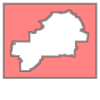

In [25]:
def get_size(g):
    b = g.bounds
    w = b[2] - b[0]
    h = b[3] - b[1]
    return math.sqrt(w*w + h*h)
max_size = 0.0
max_size_geom = None
for g in geoms:
    s = get_size(g)
    if max_size < s:
        max_size = s
        max_size_geom = g
g

In [26]:
geoms.sort(key=lambda g: -get_size(g))

In [30]:
gj = mapping(geoms[1])

In [32]:
open('/home/hadoop/notebooks/poly2.json', 'w').write(json.dumps(gj))

9058148

In [33]:
bg = geoms[1]

In [42]:
p = Polygon(bg.exterior)


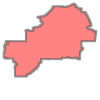

In [43]:
p

In [44]:
open('/home/hadoop/notebooks/chatta_mask.json', 'w').write(json.dumps(mapping(p)))


902405